### 1. Evaluate the spend final data

In [ ]:
import pandas as pd

spend_dtype = {
    'ACCOUNT_CDE':'str',
    'ACCOUNT_DESCRIPTION':'str',
    'BUSINESS_GROUP':'str',
    'CAPITAL_TYPE':'str',
    'CARDHOLDER_NAME':'str',
    'DEPT_L1':'str',
    'DEPT_L2':'str',
    'DEPT_L3':'str',
    'DIVERSITY_FLAG':'str',
    'FAF_CDE':'str',
    'FILE_NAME':'str',
    'FISCAL_MONTH':'str',
    'FISCAL_QUARTER':'str',
    'FISCAL_YEAR':'str',
    'FPA_FUNCTION':'str',
    'INVOICE_DATE':'str',
    'INVOICE_LINE_CURRENCY':'str',
    'INVOICE_LINE_DESCRIPTION':'str',
    'INVOICE_NUMBER':'str',
    'LQSRC':'str',
    'LSI_CATEGORY_LEVEL1':'str',
    'LSI_CATEGORY_LEVEL2':'str',
    'LSI_CATEGORY_LEVEL3':'str',
    'ORG_BUSINESS_UNIT':'str',
    'ORG_CDE':'str',
    'ORG_DESCRIPTION':'str',
    'ORG_REGION':'str',
    'PERSONAL_EXPENSE_FLAG':'str',
    'PMT_DATE':'str',
    'PROCESSED_STATUS':'str',
    'PROJECT_CDE':'str',
    'PROJECT_DESC_CORP':'str',
    'PROJECT_DESC_ERP':'str',
    'PROJECT_TYPE':'str',
    'SD_DIVERSITY_ATTRIBUTES':'str',
    'SD_ETHNICITY':'str',
    'SD_IS_8A':'str',
    'SD_IS_ABILITY_ONE':'str',
    'SD_IS_ACDBE':'str',
    'SD_IS_ANC_INDIAN_TRIBE':'str',
    'SD_IS_DBE':'str',
    'SD_IS_DISABLED':'str',
    'SD_IS_EDWOSB':'str',
    'SD_IS_HBCU':'str',
    'SD_IS_HUB':'str',
    'SD_IS_LGBT':'str',
    'SD_IS_MBE':'str',
    'SD_IS_SDB':'str',
    'SD_IS_SDVET':'str',
    'SD_IS_SELF_SDB':'str',
    'SD_IS_SMALL':'str',
    'SD_IS_VET':'str',
    'SD_IS_WBE':'str',
    'SD_IS_WOSB':'str',
    'SOURCE_DATA':'str',
    'SOURCE_SYSTEM':'str',
    'SOURCING_SEGMENT':'str',
    'SPEND_TIERS_ANNUAL':'str',
    'SPEND_USD':float,
    'SUPPLIER_ADDRESS_1':'str',
    'SUPPLIER_ADDRESS_2':'str',
    'SUPPLIER_ADDRESS_3':'str',
    'SUPPLIER_CITY':'str',
    'SUPPLIER_COUNTRY':'str',
    'SUPPLIER_ERP':'str',
    'SUPPLIER_NBR':'str',
    'SUPPLIER_NORMALIZED':'str',
    'SUPPLIER_PARENT':'str',
    'SUPPLIER_STATE':'str',
    'SUPPLIER_TYPE':'str',
    'SUPPLIER_ZIP_POSTAL_CDE':'str',
    'HOLDING_COMPANY':'str',
}

# Read the I2P export
spend_final = pd.read_csv('SUB_OUTPUT_FY24_Q1_v.2.csv', encoding='UTF-8-SIG',dtype=spend_dtype)

# Clean whitespaces in the SUPPLIER_NBR
spend_final['SUPPLIER_NBR']=spend_final['SUPPLIER_NBR'].str.strip()

# Print the shape
print(f"Subway Insights FY24 Q1 Shape:{spend_final.shape}")

Subway Insights FY24 Q1 Shape:(14103, 72)


In [ ]:
# 1. Get the row count of the dataset
row_count = spend_final.shape[0]

# 2. Get the distinct count of 'SUPPLIER_NBR'
distinct_suppliers = spend_final['SUPPLIER_NBR'].nunique()

# 3. Distinct count of 'SUPPLIER_NBR' across 'BUSINESS_GROUP'
distinct_suppliers_per_group = spend_final.groupby('BUSINESS_GROUP')['SUPPLIER_NBR'].nunique().reset_index()

# Print the results
print("Row count of the dataset:", row_count)
print("Distinct count of SUPPLIER_NBR:", distinct_suppliers)
print("Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:")
print(distinct_suppliers_per_group)


Row count of the dataset: 14103
Distinct count of SUPPLIER_NBR: 2940
Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:
  BUSINESS_GROUP  SUPPLIER_NBR
0            FAF           479
1         Subway          2463


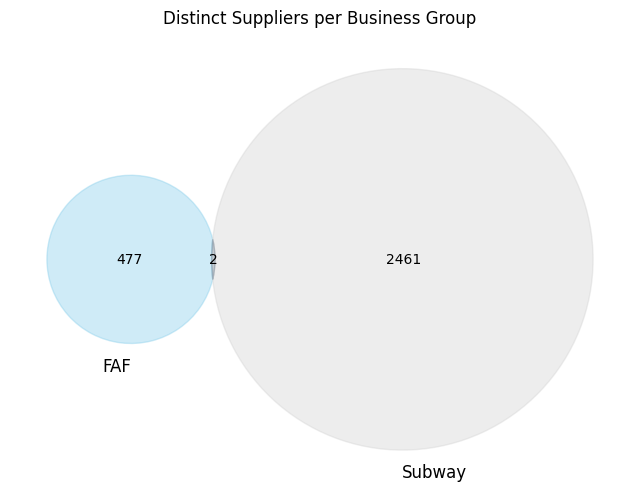

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Check how many distinct BUSINESS_GROUP values are present
business_groups = spend_final['BUSINESS_GROUP'].unique()

# Get unique suppliers for each BUSINESS_GROUP
group1 = set(spend_final[spend_final['BUSINESS_GROUP'] == business_groups[0]]['SUPPLIER_NBR'])
group2 = set(spend_final[spend_final['BUSINESS_GROUP'] == business_groups[1]]['SUPPLIER_NBR'])

# Create a Venn diagram and capture it in a variable
plt.figure(figsize=(8, 8))
venn_diagram = venn2([group1, group2], set_labels=(business_groups[0], business_groups[1]))

# Setting colors for each section of the Venn diagram
venn_diagram.get_patch_by_id('10').set_color('skyblue')  # Business Group 1 only
venn_diagram.get_patch_by_id('01').set_color('lightgray')  # Business Group 2 only
venn_diagram.get_patch_by_id('11').set_color('slategray')  # Intersection

plt.title('Distinct Suppliers per Business Group')
plt.show()

### 2. Evaluate the diversity data ikigai export

In [ ]:
import pandas as pd

diversity_dtype = {
    'DIVERSITY_FLAG':'str',
    'SD_8A_SRC':'str',
    'SD_8A_SRC_VALID':'str',
    'SD_ABILITY_ONE_SRC':'str',
    'SD_ABILITY_ONE_SRC_VALID':'str',
    'SD_ACDBE_SRC':'str',
    'SD_ACDBE_SRC_VALID':'str',
    'SD_ALT_MBE_SRC':'str',
    'SD_ALT_MBE_SRC_VALID':'str',
    'SD_ALT_WBE_SRC':'str',
    'SD_ALT_WBE_SRC_VALID':'str',
    'SD_ANC_INDIAN_TRIBE_SRC':'str',
    'SD_ANC_SRC_VALID':'str',
    'SD_CAGE':'str',
    'SD_CORP_STRUCTURE':'str',
    'SD_DBE_SRC':'str',
    'SD_DBE_SRC_VALID':'str',
    'SD_DISABILITYIN_CERTIFIED':'str',
    'SD_DISABLED_SRC':'str',
    'SD_DISABLED_SRC_VALID':'str',
    'SD_DIVERSITY_ATTRIBUTES':'str',
    'SD_EDWOSB_SRC':'str',
    'SD_EDWOSB_SRC_VALID':'str',
    'SD_ETHNICITY':'str',
    'SD_HBCU_SRC':'str',
    'SD_HBCU_SRC_VALID':'str',
    'SD_HUB_SRC':'str',
    'SD_HUB_SRC_VALID':'str',
    'SD_INDUSTRY':'str',
    'SD_IS_8A':'str',
    'SD_IS_ABILITY_ONE':'str',
    'SD_IS_ACDBE':'str',
    'SD_IS_ANC_INDIAN_TRIBE':'str',
    'SD_IS_DBE':'str',
    'SD_IS_DISABLED':'str',
    'SD_IS_EDWOSB':'str',
    'SD_IS_HBCU':'str',
    'SD_IS_HUB':'str',
    'SD_IS_LGBT':'str',
    'SD_IS_MBE':'str',
    'SD_IS_SDB':'str',
    'SD_IS_SDVET':'str',
    'SD_IS_SELF_SDB':'str',
    'SD_IS_SMALL':'str',
    'SD_IS_VET':'str',
    'SD_IS_WBE':'str',
    'SD_IS_WOSB':'str',
    'SD_LGBT_SRC':'str',
    'SD_LGBT_SRC_VALID':'str',
    'SD_MBE_SRC':'str',
    'SD_MBE_SRC_VALID':'str',
    'SD_NAICS':'str',
    'SD_NGLCC_CERTIFIED':'str',
    'SD_NMSDC_CERTIFIED':'str',
    'SD_NVBDC_CERTIFIED':'str',
    'SD_SAM_EXPDATE':'str',
    'SD_SAM_REGISTERED':'str',
    'SD_SDB_SRC':'str',
    'SD_SDB_SRC_VALID':'str',
    'SD_SDVET_SRC':'str',
    'SD_SDVET_SRC_VALID':'str',
    'SD_SELFSDB_SRC':'str',
    'SD_SELFSDB_SRC_VALID':'str',
    'SD_SIC':'str',
    'SD_SMALL_SRC':'str',
    'SD_SMALL_SRC_VALID':'str',
    'SD_VET_SRC':'str',
    'SD_VET_SRC_VALID':'str',
    'SD_WBE_SRC':'str',
    'SD_WBE_SRC_VALID':'str',
    'SD_WBENC_CERTIFIED':'str',
    'SD_WOSB_SRC':'str',
    'SD_WOSB_SRC_VALID':'str',
    'FILE_NAME':'str',
    'FISCAL_YEAR':'str',
    'FISCAL_QUARTER':'str',
    'LS_CAT1':'str',
    'LS_CAT2':'str',
    'LS_CAT3':'str',
    'SPEND_USD':float,
    'SUPPLIER_ADDRESS_1':'str',
    'SUPPLIER_ADDRESS_2':'str',
    'SUPPLIER_CITY':'str',
    'SUPPLIER_COUNTRY':'str',
    'SUPPLIER_ERP':'str',
    'SUPPLIER_NORMALIZED':'str',
    'SUPPLIER_NBR':'str',
    'SUPPLIER_STATE':'str',
    'SUPPLIER_ZIP_POSTAL_CDE':'str',
    'BUSINESS_GROUP':'str',
    'FPA_FUNCTION':'str',
    'SUPPLIER_TYPE':'str',
}

# Read the Diversity Export
diversity_final = pd.read_csv('C09.2 SUB FY24 Q1 Quarterly Suppliers and Spend for Insights.csv', encoding='UTF-8-SIG', dtype=diversity_dtype)

# Clean whitespaces in the SUPPLIER_NBR
diversity_final['SUPPLIER_NBR'] = diversity_final['SUPPLIER_NBR'].str.strip()

# Print the shape to confirm data load
print(f"Subway Diversity FY24 Q1 Shape: {diversity_final.shape}")

# Check for nulls in the SUPPLIER_NBR
print("Null SUPPLIER_NBR in Diversity Final:", diversity_final['SUPPLIER_NBR'].isnull().sum())

# Check unique counts to ensure numbers are present
print("Unique SUPPLIER_NBR in Diversity Final:", diversity_final['SUPPLIER_NBR'].nunique())

# Distinct count of 'SUPPLIER_NBR' across 'BUSINESS_GROUP'
distinct_suppliers_per_group = diversity_final.groupby('BUSINESS_GROUP')['SUPPLIER_NBR'].nunique().reset_index()
print("Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:")
print(distinct_suppliers_per_group)

Subway Diversity FY24 Q1 Shape: (425, 92)
Null SUPPLIER_NBR in Diversity Final: 0
Unique SUPPLIER_NBR in Diversity Final: 320
Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:
  BUSINESS_GROUP  SUPPLIER_NBR
0         Subway           320


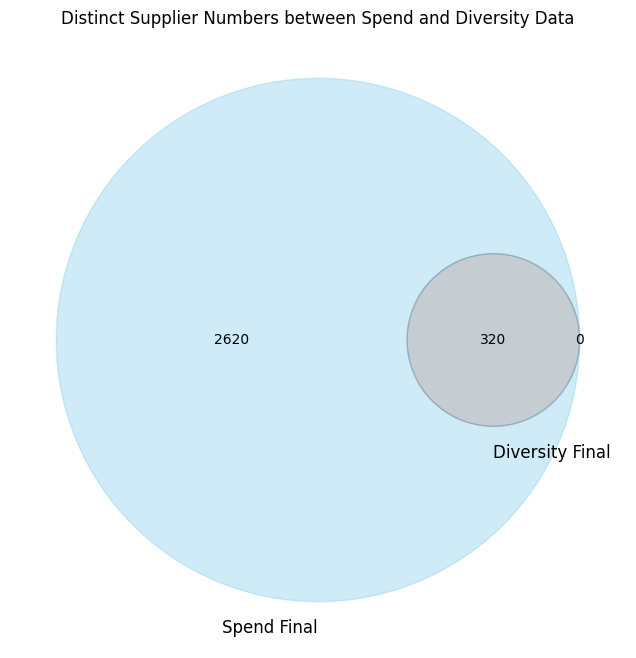

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Perform a full outer join on the two datasets using 'SUPPLIER_NBR'
merged_data = pd.merge(spend_final, diversity_final, on='SUPPLIER_NBR', how='outer', indicator=True)

# Extract suppliers exclusive to each dataset and those that are intersected, using sets to ensure distinct values
spend_only = set(merged_data.loc[merged_data['_merge'] == 'left_only', 'SUPPLIER_NBR'])
diversity_only = set(merged_data.loc[merged_data['_merge'] == 'right_only', 'SUPPLIER_NBR'])
both = set(merged_data.loc[merged_data['_merge'] == 'both', 'SUPPLIER_NBR'])

# Create a Venn diagram using the count of distinct suppliers in each category
plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(len(spend_only), len(diversity_only), len(both)), set_labels=('Spend Final', 'Diversity Final'))

# Optional: Customize colors
venn_diagram.get_patch_by_id('10').set_color('skyblue')  # Spend Final only
venn_diagram.get_patch_by_id('01').set_color('lightgray')  # Diversity Final only
venn_diagram.get_patch_by_id('11').set_color('slategray')  # Intersection

plt.title('Distinct Supplier Numbers between Spend and Diversity Data')
plt.show()



### 3. Evaluate the diversity source data (Supplier to SIO)

In [ ]:
import pandas as pd

dtype = {
    'SUPPLIER_NBR':'str',
    'SUPPLIER_ERP':'str',
    'SUPPLIER_NORMALIZED':'str',
    'SUPPLIER_ADDRESS_1':'str',
    'SUPPLIER_ADDRESS_2':'str',
    'SUPPLIER_CITY':'str',
    'SUPPLIER_STATE':'str',
    'SUPPLIER_ZIP_POSTAL_CDE':'str',
    'SUPPLIER_COUNTRY':'str',
    'LSI_CATEGORY_LEVEL1':'str',
    'LSI_CATEGORY_LEVEL2':'str',
    'LSI_CATEGORY_LEVEL3':'str',
    'FISCAL_QUARTER':'str',
    'FISCAL_YEAR':'str',
    'SPEND_USD':'str',
    'BUSINESS_GROUP':'str',
    'FPA_FUNCTION':'str',
    'SUPPLIER_TYPE':'str',
}

# Read the report extracted from Oracle
spend_to_sio = pd.read_csv('sub_supplier_list_to_SIO_5.3.24.csv', encoding='UTF-8-SIG', dtype=dtype)

# Clean whitespaces in the SUPPLIER_NBR
spend_to_sio['SUPPLIER_NBR'] = spend_to_sio['SUPPLIER_NBR'].str.strip()

# Print the shape to confirm data load
print(f"Subway Diversity FY24 Q1 Shape: {spend_to_sio.shape}")

# Check for nulls in the SUPPLIER_NBR
print("Null SUPPLIER_NBR in Diversity Final:", spend_to_sio['SUPPLIER_NBR'].isnull().sum())

# Check unique counts to ensure numbers are present
print("Unique SUPPLIER_NBR in Diversity Final:", spend_to_sio['SUPPLIER_NBR'].nunique())

# Distinct count of 'SUPPLIER_NBR' across 'BUSINESS_GROUP'
distinct_suppliers_per_group = spend_to_sio.groupby('BUSINESS_GROUP')['SUPPLIER_NBR'].nunique().reset_index()
print("Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:")
print(distinct_suppliers_per_group)

Subway Diversity FY24 Q1 Shape: (2285, 18)
Null SUPPLIER_NBR in Diversity Final: 0
Unique SUPPLIER_NBR in Diversity Final: 329
Distinct count of SUPPLIER_NBR across BUSINESS_GROUP:
  BUSINESS_GROUP  SUPPLIER_NBR
0         Subway           329


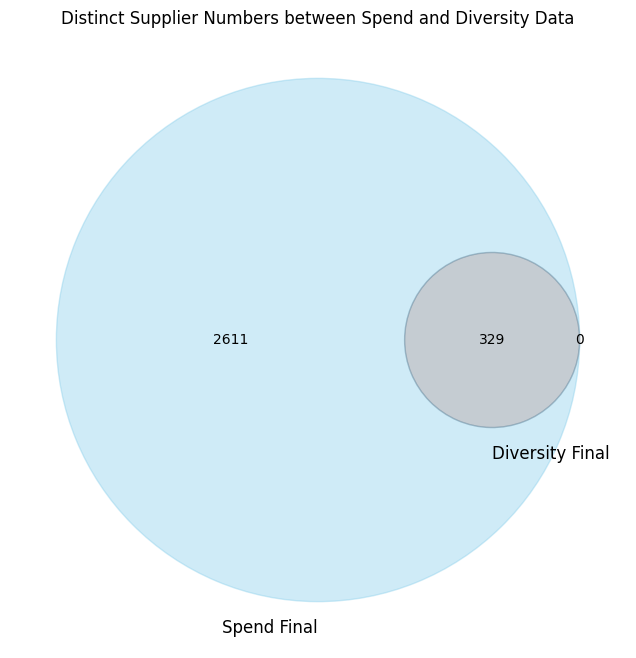

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Perform a full outer join on the two datasets using 'SUPPLIER_NBR'
merged_data = pd.merge(spend_final, spend_to_sio, on='SUPPLIER_NBR', how='outer', indicator=True)

# Extract suppliers exclusive to each dataset and those that are intersected, using sets to ensure distinct values
spend_only = set(merged_data.loc[merged_data['_merge'] == 'left_only', 'SUPPLIER_NBR'])
diversity_only = set(merged_data.loc[merged_data['_merge'] == 'right_only', 'SUPPLIER_NBR'])
both = set(merged_data.loc[merged_data['_merge'] == 'both', 'SUPPLIER_NBR'])

# Create a Venn diagram using the count of distinct suppliers in each category
plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(len(spend_only), len(diversity_only), len(both)), set_labels=('Spend Final', 'Diversity Final'))

# Optional: Customize colors
venn_diagram.get_patch_by_id('10').set_color('skyblue')  # Spend Final only
venn_diagram.get_patch_by_id('01').set_color('lightgray')  # Diversity Final only
venn_diagram.get_patch_by_id('11').set_color('slategray')  # Intersection

plt.title('Distinct Supplier Numbers between Spend and Diversity Data')
plt.show()

In [ ]:
# Read the report extracted from Oracle
spend_to_sio_aft = pd.read_csv('C09_SIO_Data_SUB.csv', encoding='UTF-8-SIG', dtype=dtype)

# Clean whitespaces in the SUPPLIER_NBR
spend_to_sio_aft['SUPPLIER_NBR'] = spend_to_sio_aft['SUPPLIER_NBR'].str.strip()

# Print the shape to confirm data load
print(f"Subway Diversity FY24 Q1 Shape: {spend_to_sio_aft.shape}")

# Check for nulls in the SUPPLIER_NBR
print("Null SUPPLIER_NBR in Diversity Final:", spend_to_sio_aft['SUPPLIER_NBR'].isnull().sum())

# Check unique counts to ensure numbers are present
print("Unique SUPPLIER_NBR in Diversity Final:", spend_to_sio_aft['SUPPLIER_NBR'].nunique())


Subway Diversity FY24 Q1 Shape: (320, 103)
Null SUPPLIER_NBR in Diversity Final: 0
Unique SUPPLIER_NBR in Diversity Final: 320
